<a href="https://colab.research.google.com/github/Manuel-Flores-F/Tmp_MacroDatos/blob/main/Copy_of_Laboratorio02_Macrodatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

#from google.colab import files
#files.upload()

Mounted at /content/drive


In [3]:
import os
from os import makedirs
print(os.getcwd())

########################## W A R N I N G !

#Crear el directorio para tener todos lo mismo (uwu)
#Ejecutar solo 1 vez
makedirs("drive/MyDrive/Curso_Macrodatos/Laboratorio_02/")
# Falla silenciosamente.
makedirs("drive/MyDrive/Curso_Macrodatos/Laboratorio_02/", exist_ok=True)


/content


FileExistsError: ignored

In [5]:
import os

dir="drive/MyDrive/Curso_Macrodatos/Laboratorio_02/"

os.chdir(dir)
print(os.getcwd())

/content/drive/MyDrive/Curso_Macrodatos/Laboratorio_02


In [6]:
%ls

peru_departamental_simple.geojson  vacunas_covid.csv
peru_provincial_simple.geojson


### Librerias

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [8]:
df=pd.read_csv('vacunas_covid.csv', encoding='utf-8')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Descripción General de la Data**

In [10]:
df.head()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210504,04cd9264959046894f4235d5c8b62794,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LA VICTORIA
1,20210504,14fd8ec748ba82a72a4c5556ee8e6372,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,SINOPHARM,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA
2,20210504,b17ceddbbde5df1c082e09dc076421fb,PERSONAL DE SALUD,NaN,MASCULINO,20210227,1,SINOPHARM,HUANUCO,HUANUCO,LEONCIO PRADO,RUPA-RUPA
3,20210504,e5e67a589a53167d365e3de4373c419d,ADULTO MAYOR,NaN,FEMENINO,20210417,1,PFIZER,LIMA SUR,LIMA,LIMA,CHORRILLOS
4,20210504,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210422,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA


In [ ]:
df

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210504,04cd9264959046894f4235d5c8b62794,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LA VICTORIA
1,20210504,14fd8ec748ba82a72a4c5556ee8e6372,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,SINOPHARM,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA
2,20210504,b17ceddbbde5df1c082e09dc076421fb,PERSONAL DE SALUD,NaN,MASCULINO,20210227,1,SINOPHARM,HUANUCO,HUANUCO,LEONCIO PRADO,RUPA-RUPA
3,20210504,e5e67a589a53167d365e3de4373c419d,ADULTO MAYOR,NaN,FEMENINO,20210417,1,PFIZER,LIMA SUR,LIMA,LIMA,CHORRILLOS
4,20210504,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210422,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA
...,...,...,...,...,...,...,...,...,...,...,...,...
1856959,20210504,b4ee21f5c2f78bb163e4e645ab1b6373,PERSONAL DE SALUD,31.0,MASCULINO,20210225,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,MAGDALENA DEL MAR
1856960,20210504,05f18908536fcbf526210efa198e1aa5,PERSONAL DE SALUD,30.0,FEMENINO,20210225,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,MAGDALENA DEL MAR
1856961,20210504,7e35f5777815eb8c474483c3270c6aa5,PERSONAL DE SALUD,22.0,MASCULINO,20210225,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,MAGDALENA DEL MAR
1856962,20210504,dad115c390dd0af157002a555e6013e4,PERSONAL DE SALUD,22.0,MASCULINO,20210225,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,MAGDALENA DEL MAR


In [11]:
df.describe()

,FECHA_CORTE,EDAD,FECHA_VACUNACION,DOSIS
count,1856964.0,1.735385e+06,1.856964e+06,1.856964e+06
mean,20210504.0,5.233137e+01,2.021035e+07,1.347082e+00
std,0.0,2.139495e+01,8.378827e+01,4.760423e-01
min,20210504.0,1.800000e+01,2.021021e+07,1.000000e+00
25%,20210504.0,3.300000e+01,2.021031e+07,1.000000e+00
50%,20210504.0,4.800000e+01,2.021033e+07,1.000000e+00
75%,20210504.0,7.300000e+01,2.021042e+07,2.000000e+00
max,20210504.0,1.210000e+02,2.021050e+07,2.000000e+00


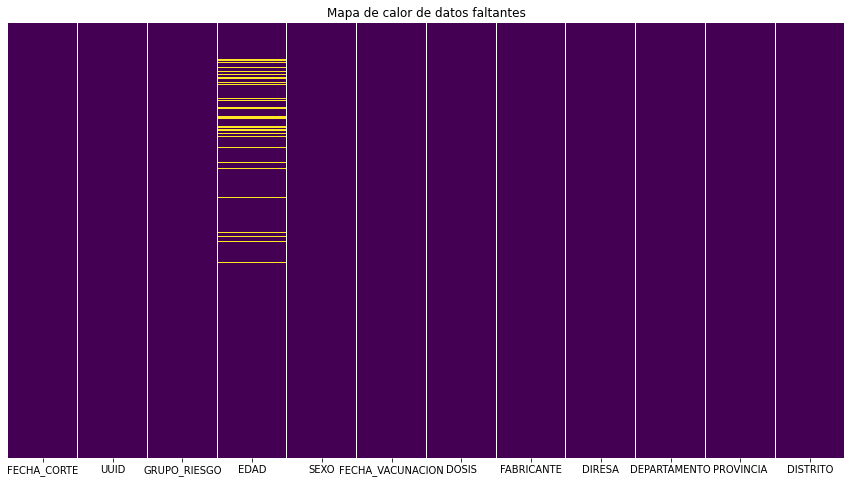

In [12]:
plt.figure(figsize=(15,8))

ax = plt.axes()
sb.heatmap(df.isna(),cbar=False, cmap='viridis',yticklabels=False)
ax.set_title('Mapa de calor de datos faltantes')
plt.savefig("data_faltante.jpg", bbox_inches='tight')
plt.show()

In [13]:
# Porcentaje de datos nan
(df.EDAD.isna().sum() / len(df.EDAD))*100

6.547192083422187

## Limpieza de Datos

In [14]:
#metodo visual para ver que columnas contienen algún missing
df.isnull().any()

FECHA_CORTE         False
UUID                False
GRUPO_RIESGO        False
EDAD                 True
SEXO                False
FECHA_VACUNACION    False
DOSIS               False
FABRICANTE          False
DIRESA              False
DEPARTAMENTO        False
PROVINCIA           False
DISTRITO            False
dtype: bool

In [15]:
# Verificamos que las columnas DEPARTAMENTO, GRUPO_RIESGO y SEXO tengan los valores indicados
print(df['DEPARTAMENTO'].unique())
print(df['GRUPO_RIESGO'].unique())
print(df['SEXO'].unique())
print(df['EDAD'].unique())

['LIMA' 'LA LIBERTAD' 'HUANUCO' 'UCAYALI' 'LORETO' 'CALLAO' 'ICA' 'PASCO'
 'CAJAMARCA' 'PIURA' 'AREQUIPA' 'AYACUCHO' 'ANCASH' 'LAMBAYEQUE'
 'MADRE DE DIOS' 'SAN MARTIN' 'APURIMAC' 'CUSCO' 'AMAZONAS' 'JUNIN'
 'TACNA' 'HUANCAVELICA' 'TUMBES' 'MOQUEGUA' 'PUNO']
['PERSONAL DE SALUD' 'ADULTO MAYOR' 'PERSONAL MILITAR Ó FF AA'
 'BRIGADISTAS' 'POLICIA NACIONAL DEL PERU' 'PERSONAL DE SEGURIDAD'
 'TRABAJADOR Ó PERSONAL DE LIMPIEZA' 'BOMBERO'
 'ESTUDIANTES DE CIENCIAS DE LA SALUD']
['MASCULINO' 'FEMENINO']
[ nan  81.  69.  73.  72.  62.  75.  86.  78.  71.  77.  74.  87.  95.
  60.  80.  70.  76.  92.  85.  84.  65.  61.  83.  79.  58.  90.  56.
  66.  82.  59.  94.  91.  89.  64.  68.  63.  55.  57.  54.  88.  96.
  67.  97.  53.  93. 100.  98.  52.  50.  99. 101.  32.  51.  26.  49.
  48. 105.  47.  44.  46.  45.  43.  42. 102. 104.  33.  31.  28.  36.
  30.  35.  41. 103.  37.  34.  39. 110.  20. 107. 116. 106. 109. 111.
 112.  19. 108. 117.  40. 119. 114.  29. 118.  22. 113.  38.  24.  21.
  

In [16]:
# Filtramos las filas que no tienen valor en las columnas EDAD o SEXO
df = df[df['EDAD'].notnull() & df['SEXO'].notnull()]

## 1.- Vacunación por Genero

In [17]:
#plt.bar(df['DEPARTAMENTO'], df['DOSIS'])

cont_pais_gen = df.groupby(['SEXO']).count().reset_index()
cont_pais_gen['Conteo'] = cont_pais_gen['DOSIS']

cont_f = cont_pais_gen[cont_pais_gen['SEXO'] == 'FEMENINO']
cont_m = cont_pais_gen[cont_pais_gen['SEXO'] == 'MASCULINO']
#cont_m.head()

###1.1.- Por Genero a nivel de pais

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


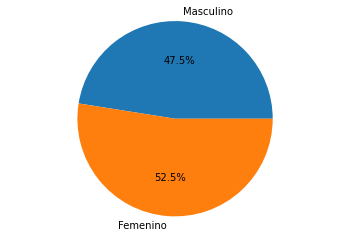

In [18]:
#Barras comparadas Dosis por sexo en cada departamento
import numpy as np
width = 0.5 #ancho
labels = cont_m['DOSIS']
x = np.arange(len(labels))

labels = 'Masculino', 'Femenino'
sizes = [cont_m['Conteo'],cont_f['Conteo']]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  
plt.savefig("porcentaje_genero.jpg", bbox_inches='tight')
plt.show()

In [20]:
#plt.bar(df['DEPARTAMENTO'], df['DOSIS'])

cont_pais_gen = df.groupby(['SEXO','DEPARTAMENTO']).count().reset_index()
cont_pais_gen['Conteo'] = cont_pais_gen['DOSIS']

cont_f = cont_pais_gen[cont_pais_gen['SEXO'] == 'FEMENINO']
cont_m = cont_pais_gen[cont_pais_gen['SEXO'] == 'MASCULINO']
#cont_m.head(5)

###1.2.- Por Genero a nivel de departamento

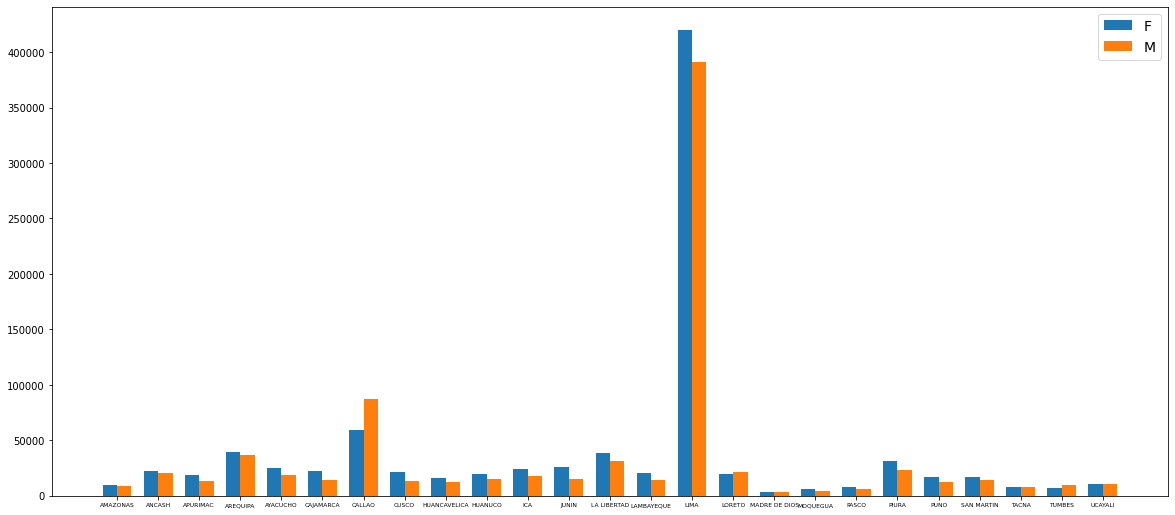

In [21]:
#Barras comparadas Dosis por sexo en cada departamento
import numpy as np
width = 0.35 #ancho
labels = cont_m['DEPARTAMENTO']
x = np.arange(len(labels))

f, ax = plt.subplots(figsize=(20,9)) # set the size that you'd like (width, height)
plt.bar(x - width/2, cont_f['Conteo'],width,label='F')
plt.bar(x + width/2, cont_m['Conteo'],width,label='M')

plt.xticks(x,labels, fontsize=6)
ax.legend(fontsize = 14)
plt.savefig("porcentaje_dpt.jpg", bbox_inches='tight')
plt.show()

##2.- Vacunación por Edad

### 2.1.- Vacunación por Edad General

1.   Primera Infancia (0-5 años)
2.   Infancia (6 - 11 años)
3.   Adolescencia (12 - 18 años)
4.   Juventud (19 - 26 años)
5.   Adultez (27- 59 años)
6.   Persona Mayor (60 años o mas) envejecimiento y vejez


In [22]:
#plt.bar(df['DEPARTAMENTO'], df['DOSIS'])

cont_pais_gen = df.groupby(['EDAD']).count().reset_index()
cont_pais_gen['Conteo'] = cont_pais_gen['DOSIS']

cont_04 = cont_pais_gen[cont_pais_gen['EDAD'].between(19, 26)]
cont_05 = cont_pais_gen[cont_pais_gen['EDAD'].between(27, 59)]
cont_06 = cont_pais_gen[cont_pais_gen['EDAD'].between(60, 110)]
#cont_05.Conteo.sum()
#cont_04.count()


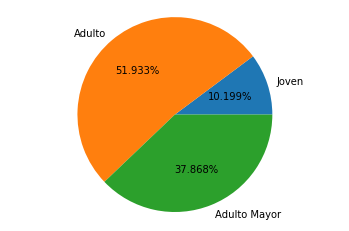

In [23]:
#Barras comparadas Dosis por sexo en cada departamento
import numpy as np
width = 0.35 #ancho
x = np.arange(len(labels))

labels = 'Joven', 'Adulto','Adulto Mayor'
sizes = [cont_04.Conteo.sum(),cont_05.Conteo.sum(),cont_06.Conteo.sum()]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.3f%%')
ax1.axis('equal')  
plt.savefig("porcentaje_edad.jpg", bbox_inches='tight')
plt.show()

In [42]:
#Contar por pais y Genero 
cont_pais_gen = df.groupby(['SEXO','FABRICANTE']).count().reset_index()
cont_pais_gen['Conteo'] = cont_pais_gen['DOSIS']
#cont_pais_gen = cont_pais_gen.drop(['edad','gasto','dia'],axis=1)
cont_f = cont_pais_gen[cont_pais_gen['SEXO'] == 'FEMENINO']
cont_m = cont_pais_gen[cont_pais_gen['SEXO'] == 'MASCULINO']

## Dosis totales por Fabricante



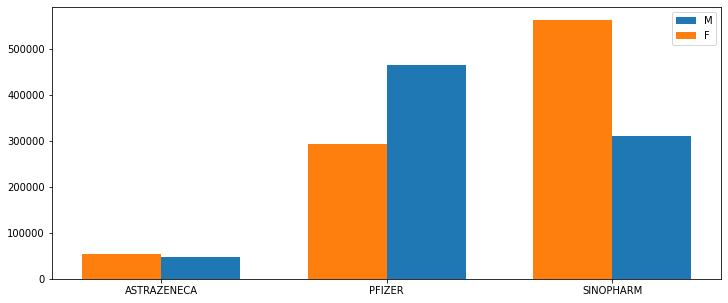

In [43]:
#Barras comparadas #Dosis por sexo en cada fabricante
import numpy as np
width = 0.35 #ancho
labels = cont_m['FABRICANTE']
x = np.arange(len(labels))

f, ax = plt.subplots(figsize=(12,5)) # set the size that you'd like (width, height)
plt.bar(x + width/2, cont_m['Conteo'],width,label='M')
plt.bar(x - width/2, cont_f['Conteo'],width,label='F')
plt.xticks(x,labels, fontsize=10)
ax.legend(fontsize = 10)
plt.savefig("porcentaje_fabricantes.jpg", bbox_inches='tight')
plt.show()

## Dosis totales por Grupo de riesgo y genero

In [44]:
#Contar por grupo de riesgo y Genero 
cont_pais_gen = df.groupby(['SEXO','GRUPO_RIESGO']).count().reset_index()
cont_pais_gen['Conteo'] = cont_pais_gen['DOSIS']
#cont_pais_gen = cont_pais_gen.drop(['edad','gasto','dia'],axis=1)
cont_f = cont_pais_gen[cont_pais_gen['SEXO'] == 'FEMENINO']
cont_m = cont_pais_gen[cont_pais_gen['SEXO'] == 'MASCULINO']

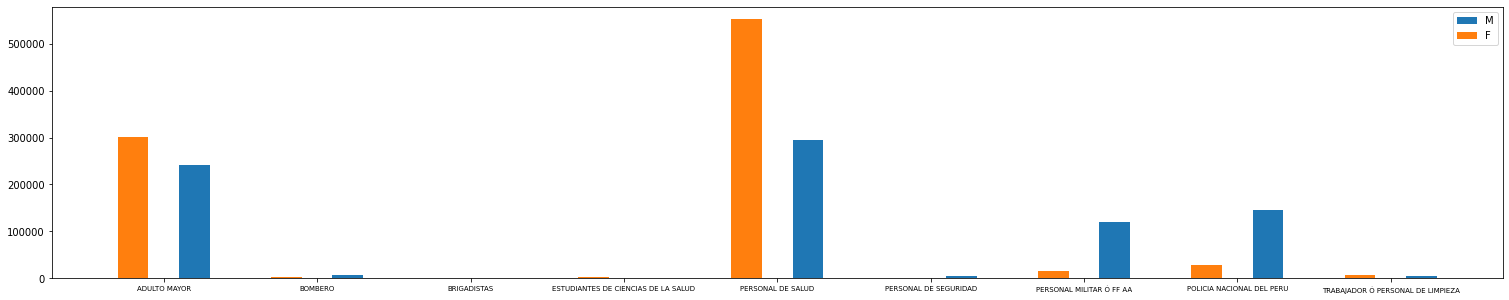

In [49]:
import numpy as np
width = 0.20 #ancho
labels = cont_m['GRUPO_RIESGO']
x = np.arange(len(labels))

f, ax = plt.subplots(figsize=(26,5)) # set the size that you'd like (width, height)
plt.bar(x + width, cont_m['Conteo'],width,label='M')
plt.bar(x - width, cont_f['Conteo'],width,label='F')
plt.xticks(x,labels, fontsize=7)
ax.legend(fontsize = 10)
plt.savefig("porcentaje_grupoDeRiesgo.jpg", bbox_inches='tight')
plt.show()

### Evolución de las Dosis de Vacunas diarias y acumuladas

In [50]:
format='%Y%m%d'

df['FECHA_VACUNACION'] = pd.to_datetime(df['FECHA_VACUNACION'], format=format)

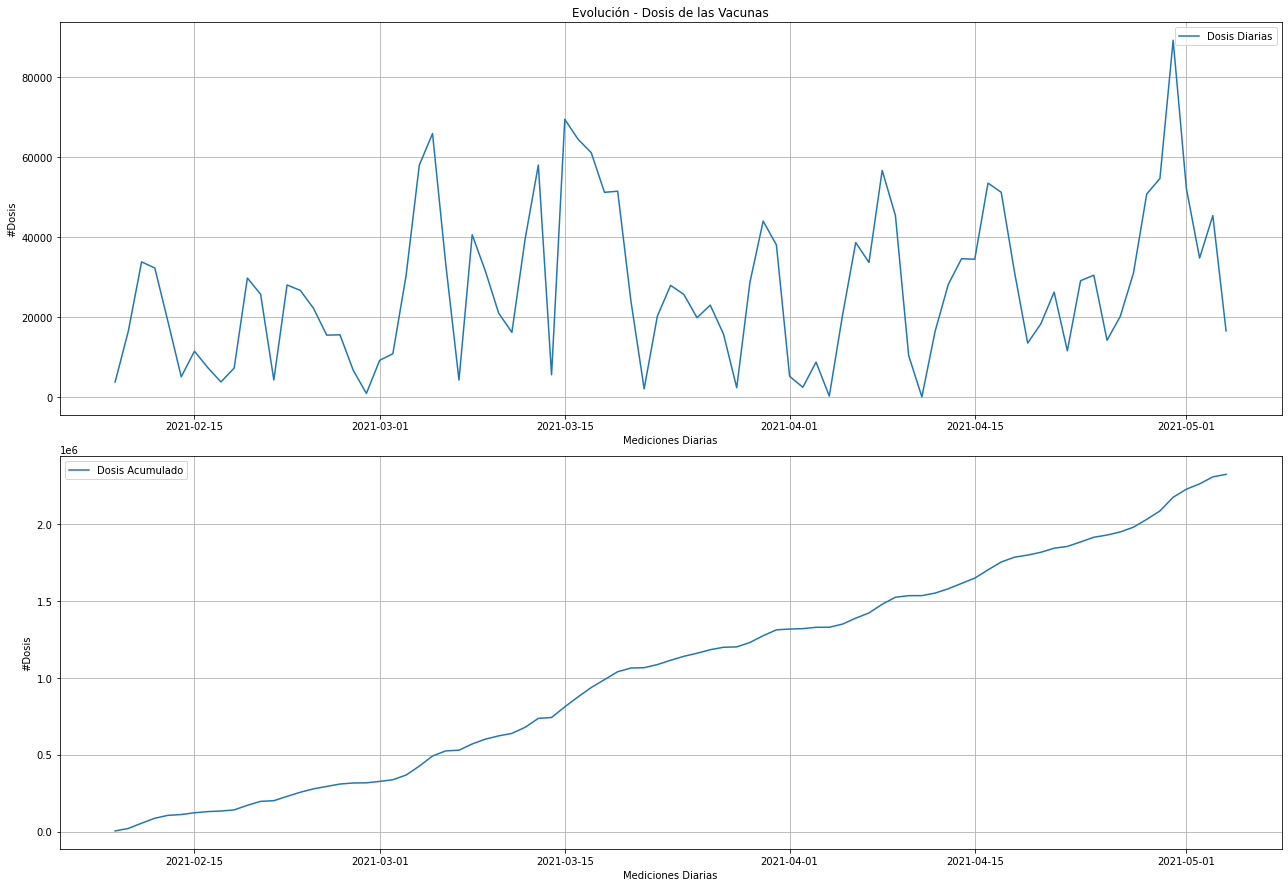

In [51]:
#Graficando #Dosis por fecha de vacunacion
suma_edad_df = df.groupby(['FECHA_VACUNACION']).sum().reset_index()

plt.figure(figsize=(18,12))
# Primera grafica
plt.subplot(2,1,1)

plt.plot(suma_edad_df['FECHA_VACUNACION'],suma_edad_df['DOSIS'], '-', label="Dosis Diarias")

plt.title("Evolución - Dosis de las Vacunas")
plt.ylabel('#Dosis')
plt.xlabel('Mediciones Diarias')
plt.legend()
plt.grid()
plt.tight_layout()

# Segunda grafica
plt.subplot(2,1,2)

plt.plot(suma_edad_df['FECHA_VACUNACION'],np.cumsum(suma_edad_df['DOSIS']), '-', label="Dosis Acumulado")

plt.ylabel('#Dosis')
plt.xlabel('Mediciones Diarias')
plt.legend()
plt.grid()
plt.savefig("historial_dosis_fecha.jpg", bbox_inches='tight')
plt.show()

## Distribución porcentual de individuos según Dosis

In [52]:
# Nos quedamos con los datos que correspondan solo a la primera dosis
UnaDosis = df[df['DOSIS'] == 1]
DosDosis = df[df['DOSIS'] == 2]


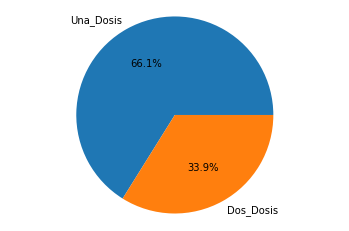

In [53]:
#Barras comparadas Dosis por sexo en cada departamento
import numpy as np
width = 0.5 #ancho
labels = cont_m['DOSIS']
x = np.arange(len(labels))

labels = 'Primera Dosis', 'Segunda Dosis'
sizes = [UnaDosis['DOSIS'].shape[0], DosDosis['DOSIS'].shape[0]]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  
plt.savefig("porcentaje_SegunDosis.jpg", bbox_inches='tight')
plt.show()

Comparando la población que ha recibido solo 1 Vacuna

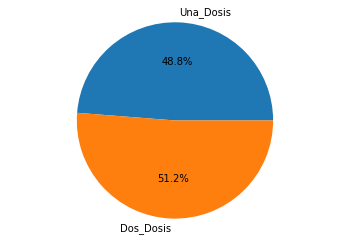

In [54]:
#Barras comparadas Dosis por sexo en cada departamento
import numpy as np
width = 0.5 #ancho
labels = cont_m['DOSIS']
x = np.arange(len(labels))

labels = 'Una_Dosis', 'Dos_Dosis'
sizes = [UnaDosis['DOSIS'].shape[0] - DosDosis['DOSIS'].shape[0], DosDosis['DOSIS'].shape[0]]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  
plt.savefig("porcentaje_SegunDosis.jpg", bbox_inches='tight')
plt.show()

## Distribucion de vacunados - segunda dosis - Distrito

#Mapa de Calor

In [25]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.5MB/s 
     |████████████████████████████████| 6.5MB 12.3MB/s 
     |████████████████████████████████| 15.3MB 253kB/s 


In [26]:
import geopandas as gpd

url_geojson = "peru_departamental_simple.geojson"

region_geojson = gpd.read_file(url_geojson)
region_geojson.head()


,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


In [27]:
#DOSIS POR REGION
suma_edad_df = df.groupby(['DEPARTAMENTO']).sum().reset_index() 

region_geojson['COUNT']=suma_edad_df['DOSIS']
region_geojson

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,23713,01,3.930647e+06,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,60064,02,3.596225e+06,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,39507,03,2.111415e+06,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,108373,04,6.325589e+06,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,53380,05,4.350382e+06,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."
5,CAJAMARCA,50724,06,3.304466e+06,"POLYGON ((-79.32259 -7.02568, -79.29663 -6.999..."
6,CALLAO,201290,07,1.414095e+04,"POLYGON ((-77.18710 -11.82836, -77.12605 -11.8..."
7,CUSCO,48952,08,7.207614e+06,"POLYGON ((-72.47177 -14.66140, -72.46170 -14.6..."
8,HUANCAVELICA,34647,09,2.206504e+06,"POLYGON ((-75.05905 -14.12962, -75.10884 -14.0..."
9,HUANUCO,43571,10,3.720053e+06,"POLYGON ((-77.31749 -8.53015, -77.26408 -8.467..."


##Mapa de Calor Por Region / Departamento

<function matplotlib.pyplot.show>

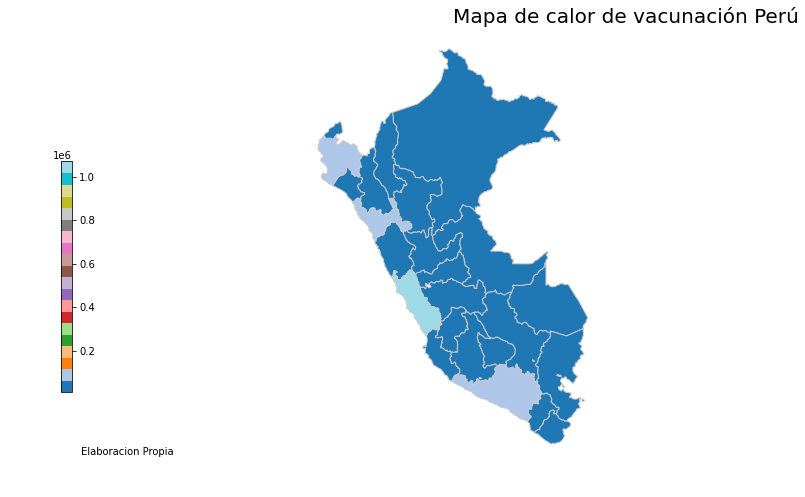

In [28]:
title = 'Mapa de calor de vacunación Perú'
col = 'COUNT'
source = 'Elaboracion Propia'
vmin = region_geojson[col].min()
vmax = region_geojson[col].max()
cmap = 'tab20'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 8))

# Remove the axis
ax.axis('off')
region_geojson.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
loc='left'
ax.set_title(title, fontdict={'fontsize': '20', 'fontweight': '3', 'horizontalalignment': loc})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
plt.savefig("mapa.jpg", bbox_inches='tight')
plt.show

##Mapa de Calor Por Provincia

In [29]:
url_geojson = "peru_provincial_simple.geojson"

provincial_geojson = gpd.read_file(url_geojson)
provincial_geojson.head()

,COUNT,FIRST_IDPR,NOMBPROV,FIRST_NOMB,LAST_DCTO,LAST_LEY,FIRST_FECH,LAST_FECHA,MIN_SHAPE_,ha,geometry
0,9,0301,ABANCAY,APURIMAC,LEY,S/N,28/12/1961,21/11/1893,3.458273e+05,345827.34,"POLYGON ((-72.77286 -13.44888, -72.74545 -13.4..."
1,8,0902,ACOBAMBA,HUANCAVELICA,LEY,5292,23/11/1925,23/11/1925,9.263674e+04,92636.74,"POLYGON ((-74.32362 -12.83251, -74.31945 -12.8..."
2,7,0802,ACOMAYO,CUSCO,LEY,S/N,11/11/1964,02/01/1857,9.328581e+04,93285.81,"POLYGON ((-71.51688 -13.96722, -71.44034 -14.1..."
3,5,0202,AIJA,ANCASH,LEY,8188,21/12/1907,05/03/1936,6.963963e+04,69639.63,"POLYGON ((-77.96140 -9.78024, -77.86786 -9.763..."
4,6,1602,ALTO AMAZONAS,LORETO,LEY,S/N,08/09/1964,02/01/1857,1.917213e+06,1917212.66,"POLYGON ((-76.28970 -3.69122, -76.24529 -3.751..."


In [33]:
#DOSIS POR Provincia
suma_edad_df = df.groupby(['PROVINCIA']).sum().reset_index() 

provincial_geojson['COUNT']=suma_edad_df['DOSIS']
provincial_geojson

,COUNT,FIRST_IDPR,NOMBPROV,FIRST_NOMB,LAST_DCTO,LAST_LEY,FIRST_FECH,LAST_FECHA,MIN_SHAPE_,ha,geometry
0,13587.0,0301,ABANCAY,APURIMAC,LEY,S/N,28/12/1961,21/11/1893,3.458273e+05,345827.34,"POLYGON ((-72.77286 -13.44888, -72.74545 -13.4..."
1,3062.0,0902,ACOBAMBA,HUANCAVELICA,LEY,5292,23/11/1925,23/11/1925,9.263674e+04,92636.74,"POLYGON ((-74.32362 -12.83251, -74.31945 -12.8..."
2,351.0,0802,ACOMAYO,CUSCO,LEY,S/N,11/11/1964,02/01/1857,9.328581e+04,93285.81,"POLYGON ((-71.51688 -13.96722, -71.44034 -14.1..."
3,150.0,0202,AIJA,ANCASH,LEY,8188,21/12/1907,05/03/1936,6.963963e+04,69639.63,"POLYGON ((-77.96140 -9.78024, -77.86786 -9.763..."
4,4007.0,1602,ALTO AMAZONAS,LORETO,LEY,S/N,08/09/1964,02/01/1857,1.917213e+06,1917212.66,"POLYGON ((-76.28970 -3.69122, -76.24529 -3.751..."
...,...,...,...,...,...,...,...,...,...,...,...
192,911.0,1510,YAUYOS,LIMA,LEY,12644,26/03/1965,02/02/1956,6.990514e+05,699051.38,"POLYGON ((-75.96140 -13.00138, -75.95743 -12.9..."
193,1167.0,0220,YUNGAY,ANCASH,L.R.,176,02/01/1857,02/08/1920,1.364843e+05,136484.28,"POLYGON ((-78.05610 -9.27470, -78.03717 -9.243..."
194,1730.0,2113,YUNGUYO,PUNO,LEY,24042,28/12/1984,28/12/1984,4.206501e+04,42065.01,"MULTIPOLYGON (((-68.91839 -16.40372, -68.91840..."
195,NaN,2403,ZARUMILLA,TUMBES,LEY,S/N,25/11/1942,12/01/1871,7.581930e+04,75819.30,"POLYGON ((-80.18074 -3.92583, -80.24359 -3.897..."


<function matplotlib.pyplot.show>

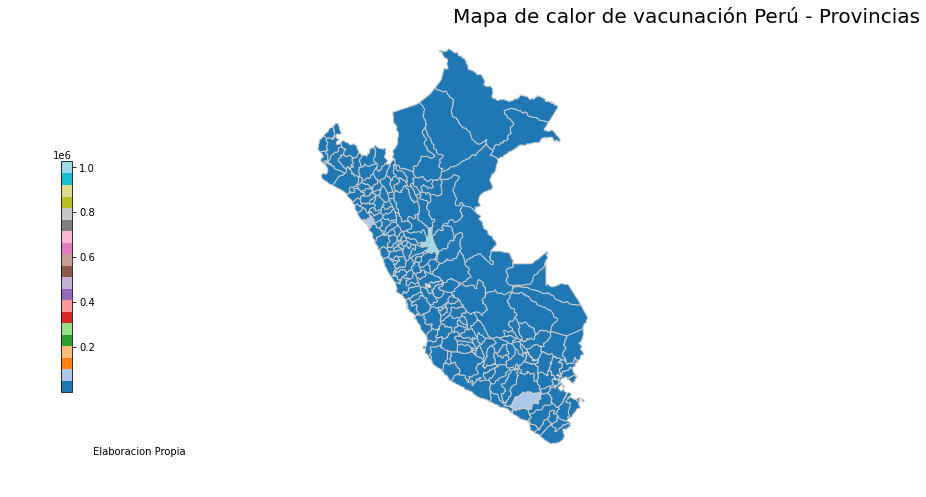

In [34]:
title = 'Mapa de calor de vacunación Perú - Provincias'
col = 'COUNT'
source = 'Elaboracion Propia'
vmin = provincial_geojson[col].min()
vmax = provincial_geojson[col].max()
cmap = 'tab20'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 8))

# Remove the axis
ax.axis('off')
provincial_geojson.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
loc='left'
ax.set_title(title, fontdict={'fontsize': '20', 'fontweight': '3', 'horizontalalignment': loc})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
#plt.savefig("mapa.jpg", bbox_inches='tight')
plt.show

Perú tiene 196 provincias